<a href="https://colab.research.google.com/github/chjohnso-um/chjohnso-um-CSC-587/blob/main/Copy_of_SupportVectorMachinesW25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03 #1000
gamma=1e-05 #0.0001
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [3]:
import pandas as pd
train = pd.read_csv('/content/drive/My Drive/DATA/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('/content/drive/My Drive/DATA/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [4]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_positive', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype=object)

In [5]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(np.int64(6), np.int64(1), np.int64(1), np.int64(2))

In [13]:
# Please use different C and gamma values or different kernels which can change
# in a loop to see if your training accuracy is increasing or decreasing. When
# you find your best, use your parameters to predict the labels of the test
# set samples. Please share your findings along with your notebook.


C=[1e+03, 1e+04, 1e+05]
gamma=[1e-05, 1e-06, 1e-07]
kernel = 'rbf'
for c in C:
  for g in gamma:
    clf = svm.SVC(C=c, gamma=g, kernel='rbf', probability=True)
    clf.fit(train.iloc[:,0:8], train.iloc[:,8])
    y_pred = clf.predict(test.iloc[:,0:8])
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(c, g, kernel, (tp+tn)/(tp+tn+fp+fn))
    print('tn:', tn, 'fp:', fp, 'fn:', fn, 'tp:', tp)

# Findings written below:

1000.0 1e-05 rbf 0.8
tn: 6 fp: 1 fn: 1 tp: 2
1000.0 1e-06 rbf 0.9
tn: 7 fp: 0 fn: 1 tp: 2
1000.0 1e-07 rbf 0.9
tn: 7 fp: 0 fn: 1 tp: 2
10000.0 1e-05 rbf 0.8
tn: 7 fp: 0 fn: 2 tp: 1
10000.0 1e-06 rbf 0.8
tn: 6 fp: 1 fn: 1 tp: 2
10000.0 1e-07 rbf 0.9
tn: 7 fp: 0 fn: 1 tp: 2
100000.0 1e-05 rbf 0.8
tn: 7 fp: 0 fn: 2 tp: 1
100000.0 1e-06 rbf 0.9
tn: 7 fp: 0 fn: 1 tp: 2
100000.0 1e-07 rbf 0.9
tn: 7 fp: 0 fn: 1 tp: 2


Findings: I tried using different kernels besides 'rbf', but they didn't seem to compile. Or at least they were taking far too long.

From the the different combinations:

c 1000 along with both gamma 1e-06 and 1e-07 resulted in an accuracy of 0.9, with 7 tn, 0 fp, 1 fn, and 2 tp.

c 10000 with gamma 1e-07 also resulted in an accuracy of 0.9 and the same values for tn, fp, fn, and tp.

c 100000 along with both gamma 1e-06 and 1e-07 also resulted in an accuracy of 0.9 and the same values for tn, fp, fn, and tp.

In [14]:
import numpy as np
from sklearn.metrics import roc_curve, auc
#from scipy import interp


y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
#y is the true labels, scores[:,1] which has probabilities
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
#fpr, tpr, thresholds = roc_curve(true_labels, scores[:,1], pos_label=1)

roc_auc = auc(fpr,tpr)

print(fpr)

print(tpr)

print(thresholds)

[0.         0.         0.         0.28571429 0.28571429 1.        ]
[0.         0.33333333 0.66666667 0.66666667 1.         1.        ]
[       inf 0.89812489 0.87718965 0.33351755 0.26216099 0.10678079]


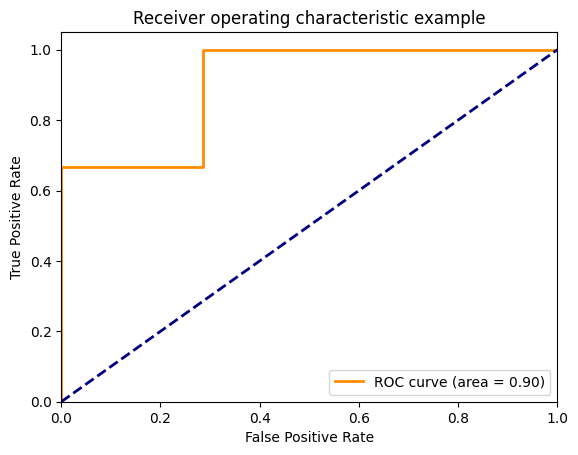

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()